# Linear Regression With one variable 

******Give input path of data file 
 
Below is the code for linear regression with one variable. Pandas library is used to fetch the data adn seprate the data. Gradientdescent function is vectorized implementation of gradient descent.
Learning rate alpha is set prior to calling the function. 
Number of iteration is set to 1500 for this case. 
 Once data is fragmented, call the 'Gradientdescent' function.
Output model parameters is printed and cost function wrt to number of iteration is plotted. 

Number of columns:2


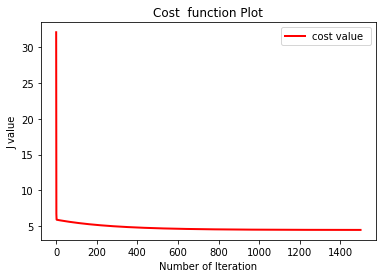

Parameters of model [[-3.63029144]
 [ 1.16636235]]


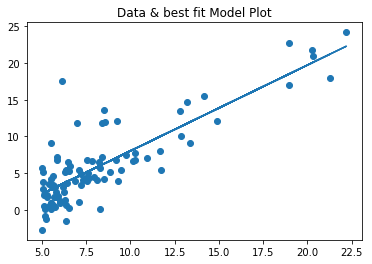

In [16]:
import time
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


    
# Gradient descent function ( Vetorized implementaion)
def GradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    j_history = np.zeros(num_iters)
    iteration=np.zeros(num_iters)
    for itr in range(num_iters):
        
        currentCost= (1/(2*m))*np.dot((np.dot(X,theta)-y).T ,(np.dot(X,theta)-y))
        grad= (1/m)*(np.dot((X.T), (np.dot(X, theta) - y)))
        theta= theta-(alpha*grad)
        
        j_history[itr] = currentCost
        iteration[itr]=itr
       
    
    plt.figure()
    plt.plot(iteration,j_history, color='red',linewidth=2,label="cost value ")
    plt.title("Cost  function Plot")
    plt.xlabel("Number of Iteration")
    plt.ylabel("J value");
    plt.legend()
    plt.show();
    return theta

        

# Load CSV/txt ( here give the path of data file. 'r' is written for indicting that given path not is not Unicode )
df = pd.read_csv(r"C:\Users\HPP\Desktop\semester\DeepLearning\food_truck_data.txt",header=None)

numberofcolumns= len(df.columns) 
print('Number of columns:%s'%numberofcolumns)
Y = df.iloc[:,len(df.columns)-1]
X_d=df.iloc[:,0]


#add 1 in each sample instances for intercept
ones = np.ones(len(X_d), int)
X_p = np.column_stack((ones,X_d))

#selection of learning rate & initial theta
alpha = 0.01
theta = np.zeros((numberofcolumns,1))

Y = Y.values
Y = Y.reshape(-1,1)

theta = GradientDescent(X_p,Y,theta, alpha, 1500)
print('Parameters of model %s'% theta)

if(numberofcolumns==2):
  plt.figure()
  plt.scatter(X_d,Y)
  plt.plot(X_d,(X_p @ theta))
  plt.title("Data & best fit Model Plot")
  plt.show();
    


# Linear Regression with multiple variable

******Give input path of data file 

Below is the code for linear regression with multiple variable. Pandas library is used to fetch the data and seprate the data. Gradientdescent function is vectorized implementation of gradient descent.
Learning rate alpha is set prior to calling the function. 
Number of iteration is set to 1000 for this case. 
 Once data is fragmented, call the 'Gradientdescent' function.
Output model parameters is printed and cost function wrt to number of iteration is plotted. 

For prediction testing 1000 sq-ft, 3 bedroom house is taken. 

Number of columns:3


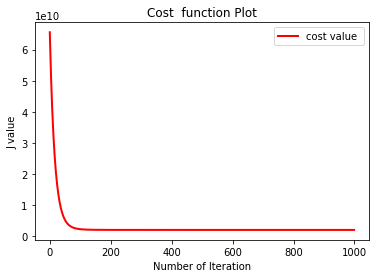

Parameters of model [[340412.65957445]
 [109447.698242  ]
 [ -6578.25662652]]
Prediction Input Data: [1000, 3]
Scaled value of prediction Input data: [ 1.         -1.27280274 -0.22609337]
Value of predicted output Data: [202594.62903921]


In [17]:

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
mean =[]
std=[]
rang=[]

def GradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    j_history = np.zeros(num_iters)
    iteration=np.zeros(num_iters)
    for itr in range(num_iters):
        
        currentCost= (1/(2*m))*np.dot((np.dot(X,theta)-y).T ,(np.dot(X,theta)-y))
        
        grad= (1/m)*(np.dot((X.T), (np.dot(X, theta) - y)))
        
        theta= theta-(alpha*grad)
        
        j_history[itr] = currentCost
        iteration[itr]=itr
      
    #print(j_history)
    plt.figure()
    plt.plot(iteration,j_history, color='red',linewidth=2,label="cost value ")
    plt.title("Cost  function Plot")
    plt.xlabel("Number of Iteration")
    plt.ylabel("J value");
    plt.legend()
    plt.show()
    return theta

def meanDataset(Z):
    global mean ,std,rang
    mean.append(np.mean(Z))
    std.append(np.std(Z))
    rang.append(max(Z)-min(Z))
    return 0  

# Load CSV/txt and seperate columns( Data preprocessing)( here give the path of data file. 'r' is written for indicting that given path not is not Unicode )
df = pd.read_csv(r"C:\Users\HPP\Desktop\semester\DeepLearning\housing_price_data.txt",header=None)
numberofcolumns= len(df.columns) 
if(numberofcolumns ==2):
    X= df.iloc[:,0]


print('Number of columns:%s'%numberofcolumns)
d={}
for i in range(0,numberofcolumns-1):
    Z=df.iloc[:,i]
    meanDataset(Z)
    d["X{0}".format(i)]=np.divide(Z-mean[i],std[i])
    
    
Y = df.iloc[:,len(df.columns)-1]
X_d=pd.DataFrame.from_dict(d)


#add 1 in each sample instances for intercept
ones = np.ones(len(X_d), int)


alpha = .03
Y = Y.values
Y = Y.reshape(-1,1)

X_p = np.column_stack((ones,X_d))
theta = np.zeros((numberofcolumns,1))

theta = GradientDescent(X_p,Y,theta, alpha, 1000)
print('Parameters of model %s'% theta)
  
#predicted value for 1000 sq-ft, 3 bedroom house:
prediction_Input_Data=[1000,3]
print('Prediction Input Data:',prediction_Input_Data)
pD=np.array(prediction_Input_Data)

X_N=np.divide(np.subtract(pD,mean),std)
X_p = np.concatenate(([1],X_N))
print('Scaled value of prediction Input data:',X_p)
prediction = theta.T @ X_p
print('Value of predicted output Data:', prediction)
    